# Calculating probabilities

This dataset comes from an Iranian telecom company, with each row representing a customer over a year period. Along with a churn label, there is information on the customers' activity, such as call failures and subscription length. I added some smaple data to have a normal distributaion for age groups

<code> import numpy as np
df_sample = df.sample(200)
np.random.seed(120)
df_sample['Age'] = np.random.randint(32,44,200)
df_sample.reset_index(drop = True, inplace = True)
df_s2 = df.sample(500)
import numpy as np
np.random.seed(120)
df_s2['Age'] = np.random.randint(32,40,500)
df_s3 = df.sample(200)
df_s3.reset_index(drop = True, inplace= True)
DF = pd.concat([df, df_sample, df_s2, df_s3], axis = 0)
DF.to_csv('telecome_company_data.csv', index=False) </code>

In [1]:
# the excel file has three headers, so it is multi-index header
import pandas as pd
df = pd.read_csv('c:/Users/nafis/Documents/Learn_data_python/telecome_company_data.csv')

In [2]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


### Q1. 
- Count the number of customers for each Age group
- Calculate the probability of a customer to fall into a each age group
- If you randomly select one of customers, what's the probability that the customer fall into age group 3 

In [113]:
df['Age Group'].unique()

array([3, 2, 1, 4, 5], dtype=int64)

In [114]:
# Count the number of customers for each Age group
df['Age Group'].value_counts()

3    1018
2     843
4     259
1     108
5     100
Name: Age Group, dtype: int64

In [115]:
# Calculate the probability of a customer to fall into a each age group
counts = df['Age Group'].value_counts()
total_counts = counts.sum()
prob_age_group = counts/total_counts

In [116]:
prob_age_group

3    0.437285
2    0.362113
4    0.111254
1    0.046392
5    0.042955
Name: Age Group, dtype: float64

In [117]:
counts[counts.index == 3]

3    1018
Name: Age Group, dtype: int64

In [118]:
#  If you randomly select one of customers, what's the probability that the customer fall into age group 3 
prob_3  = (counts[counts.index == 3]/total_counts)*100
prob_3

3    43.728522
Name: Age Group, dtype: float64

### Q2. Sampling data
- Take a sample of 5 customers without replacement and store them as sample_without_replacement
- Take a sample of 5 deals with replacement

In [119]:
# Take a sample of 5 customers without replacement and store them as sample_without_replacement
# set random seed enabiling replication
import numpy as np
np.random.seed(20)
sample_without_replacement = df.sample(5, replace = False)
sample_without_replacement

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
1594,1,0,30,0,905,12,31,7,4,1,2,34,100.425,0
1989,7,0,36,0,2078,43,25,28,3,1,2,33,184.840,1
313,0,0,32,0,2835,17,468,2,3,1,1,30,1986.080,0
1662,0,0,24,0,1263,33,23,66,4,1,1,32,89.900,0
806,6,0,43,1,2360,45,293,19,4,1,1,45,792.625,0


In [120]:
# Take a sample of 5 deals with replacement
sample_with_replacement = df.sample(5, replace = True)
sample_with_replacement

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
1230,0,0,35,1,6560,93,17,24,4,1,1,45,208.825,0
515,0,0,37,0,5900,76,165,11,3,1,1,30,899.040,0
2296,11,0,41,1,2533,62,369,28,3,1,1,18,1579.800,0
841,2,0,31,0,825,16,29,4,4,1,2,45,93.525,0
465,7,0,37,3,7100,96,207,41,3,1,1,30,1115.840,0


## Discrete distributions

- Probability distribution : describe the probability of each possible outcome in a scenario
- Expected value: mean of a probability distribution: for example for a fair dice it is :
> (1 × 1/6) + (2 × 1/6) + (3 × 1/6) + (4 ×1/6 ) + (5 × 1/6) + (6 ×1/6 ) = 3.5
- Visualizing a probability distribution: plot a diagram with probabilty of each outcome in y-axis and the outcome in x-axis, the probabilty is surface under the plot
P(die roll)≤2=1/3
<img src=probability_plot.png>

- 


In [121]:
# each side of a dice has a similar probability of 1/6 or .166667
d = [[1, 0.166667],
[2, 0.166667],
[3, 0.166667],
[4 ,0.166667],
[5, 0.166667],
[6, 0.166667 ]]


In [122]:
 df_dice = pd. DataFrame(d, columns =['number', 'prob'])
df_dice

,number,prob
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


In [123]:
# sample of 10 with replacment from dice dataframe
sample_10 = df_dice.sample(10,replace = True)
sample_10

,number,prob
2,3,0.166667
3,4,0.166667
2,3,0.166667
4,5,0.166667
4,5,0.166667
3,4,0.166667
5,6,0.166667
3,4,0.166667
0,1,0.166667
4,5,0.166667


<AxesSubplot:>

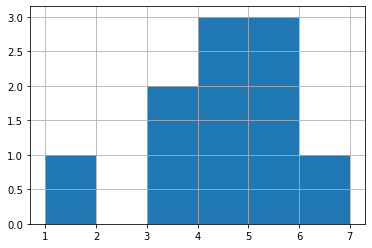

In [124]:
import matplotlib.pyplot as plt
sample_10['number'].hist(bins = np.linspace(1,7,7))


In [125]:
np.mean(sample_10['number'])
# theorically in a uniform distibution the mean is mean(df_dice['number']) = 3.5

4.0

<AxesSubplot:>

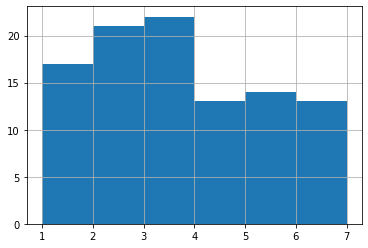

In [126]:
# increase number of samples to 100
sample_100  = df_dice.sample(100, replace = True)
sample_100['number'].hist(bins = np.linspace(1,7,7))

In [127]:
np.mean(sample_100['number'])
# with increase of number of samples it gets more similar to theroy to expected value of 3.5

3.25

<AxesSubplot:>

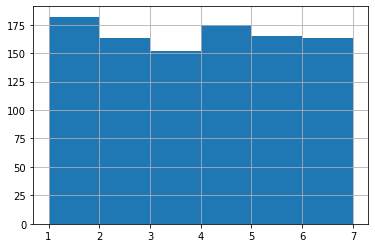

In [128]:
# increase number of samples to 100
sample_1000  = df_dice.sample(1000, replace = True)
sample_1000['number'].hist(bins = np.linspace(1,7,7))

In [129]:
np.mean(sample_1000['number'])

3.467

#### Law of large numbers:
>As the size of your sample increases, the sample mean will approach the expected value.

### Q1
- Create a histogram of the Age Group column of telecome company, setting bins to the group numbers
- we calculated before prob_age_group whihc is count of the number of each Age_group divide by the number of rows indicating number of unique customers to calculate the probability of randomly selecting a group of each size. 
- Calculate the expected value of the prob_age_group, which represents the expected customer group, by multiplying the age_group by the prob and taking the sum.

In [130]:
# dataframe of telecome company
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


<AxesSubplot:>

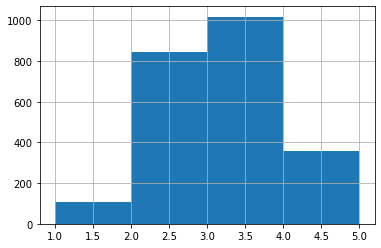

In [131]:
# Create a histogram of the Age Group column of telecome company, setting bins to the group numbers
bins = sorted(df['Age Group'].unique())
df['Age Group'].hist(bins = bins)

In [132]:
# reset index
prob_age_group = prob_age_group.reset_index()
# change column names
prob_age_group.columns = ['age_group', 'prob']

In [133]:
prob_age_group

,age_group,prob
0,3,0.437285
1,2,0.362113
2,4,0.111254
3,1,0.046392
4,5,0.042955


In [134]:
# Calculate the expected value of the prob_age_group, which represents the expected customer group, by multiplying the age_group by the prob and taking the sum.
multiply = prob_age_group['age_group']*prob_age_group['prob'] 
expected_value = sum(multiply)

In [135]:
expected_value

2.7422680412371134

## Continues Distribution

- To have continues uniform distribuation in python we can import uniform from  scipy.stats
- To calulate a probability less than a value in a uniform continues ditributaion we can call cdf from uniform libarary
- for example if bus pass a station every 12 minues, so waiting time can be every possible number between 0-12 minues 
- > To calculate probability of waiting time less than 7 minues in python we have   
<code> from scipy.stats import uniform
uniform.cdf(7,0,12)</code>

- To creat random number with a uniform distribuation with a range of upper and lower values we can use uniform.rvs
<code> from scipy.stats import uniform
uniform.rvs(upper,lower,size  = number_of_random_values )</code>

In [136]:
from scipy.stats import uniform
# probability of waiting time less than 7 minues
uniform.cdf(7,0,12)
# probability of waiting time less than 7 minues and more than 4 minutes
uniform.cdf(7,0,12)- uniform.cdf(4,0,12)

0.25000000000000006

### Q1:
- if the back up of the telecome company happens every 30 minutes, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. If a new call is made what is the pobabilitythat it need to wait for this newly-entered data for 5 min?Calculate the probability the a call needs to wait between 10 and 20 minutes?
- to have better idea of how long a  random call have to wait to be backed up, we simulate 1000 times the waiting time and create a histogram to show what he should expect
- 

In [137]:
# If a new call is made what is the pobabilitythat it need to wait for this newly-entered data for 5 min?
from scipy.stats import uniform
max_time = 30
min_time = 0
waiting_time = 5
prob1 = uniform.cdf(waiting_time, min_time,max_time)
# or we can calculate a surface under a rectangular with height of 1/30 and width of (5-0)
prob2 = 5*(1/30) 
prob1 == prob2

True

In [138]:
# Calculate the probability the a call needs to wait between 10 and 20 minutes?

prob_10_20 = uniform.cdf(20, min_time,max_time)- uniform.cdf(10, min_time,max_time)
prob_10_20

0.3333333333333333

15.025258348145732

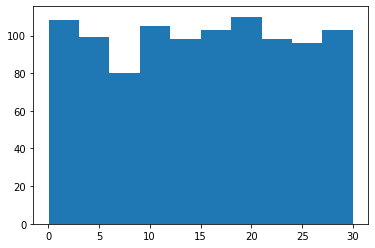

In [139]:
# simulate 1000 times the waiting time and create a histogram to show what he should expect
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
np.random.seed(126)
# Generate 1000 wait times between 0 and 30 mins
random_back_time = uniform.rvs(0,30,size = 1000)
# Create a histogram of the simulated wait times and show the plot
p = plt.hist(random_back_time)
ave_time  = np.mean(random_back_time)
ave_time

# Binomial Distribution

- Binomial distribution has two posssible outcomes like win or loss, pass fail 0 or 1 and so on
- we can call the binomial distribution from scipy.stats in python 
> <code>from scipy.stats import binom</code>
- for instance to have a random values in the distribution of heads of tails in throwing coins we can use the  bellow line note that the throwing of the coins are independant of eachother    
> <code>binom.rvs(# of coins, probability of heads/success, size=# of trials)</code>
- prbibility of getting a certin number of head   
> <code> binom.pmf(num heads, num trials, prob of heads)</code>
- Expected value
> Expected value = n × p
> Expected number of heads out of 10 is  ex_v= 10 × 0.5 = 5

In [140]:
# random sample of the one unifrom coin(50% chance for each side) throwing fopr 8 times
from scipy.stats import binom
binom.rvs(1, .5, size = 8)

array([0, 1, 0, 1, 1, 1, 0, 0])

In [141]:
# or 8 coins for throwing one time
binom.rvs(8,.5,size = 1) # represents the total number of heads in the 8 coins 

array([5])

In [142]:
# what is random sample for 3 coins with chance of .5 for having tails, the throwing is repeated for 8 times
binom.rvs(3, .5,size = 8 ) # each element in the outcome is total number of heads in each trail for all 3 coins

array([2, 2, 1, 2, 1, 2, 2, 2])

In [143]:
# what is random sample for 3 coins with chance of .75 for having tails, the throwing is repeated for 8 times
binom.rvs(3, .25,size = 8 )# the chance of having head is .25

array([0, 2, 0, 1, 0, 0, 1, 0])

In [144]:
# probability of 7 heads in throwing 10 coins? binom.pmf(num heads, num trials, prob of heads)
binom.pmf(7, 10, .5)

0.11718749999999999

In [145]:
# probability of less than 7 heads in throwing 10 coins?
binom.cdf(7,10, .5)

0.9453125

### Q.1
- Calculate the probility of two different values in status
- Each status has a binary outcome: it's either 1(sucess), or 2(failure). so you can model the status of call with a binomial distribution. simulate the status for further 10 new customers
- What's the probability of having 10 sucess in the previous simulation
- What's the probability that  4 or fewer sucess in the simulation
- what's the probability that there is  more than 4 sucess?

In [146]:
# Calculate the probility of two different values in status
p_status = df['Status'].value_counts()/sum(df['Status'].value_counts())
p_status

1    0.756443
2    0.243557
Name: Status, dtype: float64

In [147]:
# model the status of call with a binomial distribution. simulate the status for further 10 new customers
from scipy.stats import binom
np.random.seed(126)
staus_distru = binom.rvs(10, .756, size = 20 ) # lets have 20 trials

In [148]:
staus_distru

array([ 9,  9,  9,  9,  7,  8,  7, 10,  8,  8,  6,  6,  8,  5, 10,  9,  8,
        7,  8,  7])

In [149]:
# What's the probability of having 10 sucess in the previous simulation
binom.pmf(10,10, .75)

0.056313514709472656

In [150]:
#What's the probability that  4 or fewer sucess in the simulation
binom.cdf(4,10,.75)

0.019727706909179688

In [151]:
# what's the probability that there is  more than 4 sucess?
1-binom.cdf(4,10,.75)

0.9802722930908203

# Normal Distribution

- is a continous and symmetric distribution 
- bell shape diagram
- 68% of the surface is under the 1 SD(standard Deviation) of the mean, 95% is under the 2*SD and 99.7 under 3*SD
- 

# Q1
-  if height of women in the world is a normal distribution with SD= 7 and mean= 161 then calculate
-> percentage of women shorter than 154
-> percentage of women taller than 154
-> percent of women are 154-157 cm
-> What height are 90% of women shorter than?
-> What height are 90% of women taller than?
-> Generate 10 random heights

In [152]:
#percentage of women shorter than 154
from scipy.stats import norm 
norm.cdf(154,161,7)

0.15865525393145707

In [153]:
# percentage of women taller than 154
1-norm.cdf(154,161,7)

0.8413447460685429

In [154]:
# percent of women are 154-157 cm
norm.cdf(157,161,7) - norm.cdf(154,161,7)

0.1251993291672192

In [155]:
# What height are 90% of women shorter than?
norm.ppf(.9,161,7)

169.9708609588122

In [156]:
# What height are 90% of women taller than?
norm.ppf((1-.9),161,7) #it means 10% is shorter than  

152.0291390411878

In [157]:
# Generating 10 random numbers
norm.rvs(161,7, size = 10)

array([155.69406119, 171.58021385, 168.87704687, 166.50420722,
       152.85625858, 162.91507991, 170.03211109, 165.57318596,
       151.07674042, 160.83952583])

### Q2.
- what kind of distribution the Age in the telecome dataframe follows.
- What's the probability of the age is less than 25?
- What's the probability of the age is more than 40?
- What's the probability of age between 25  and 40 ?
- What number will 25% of age be less than?

(array([ 184.,  598., 1006.,  477.,   63.]),
 array([10., 19., 28., 37., 46., 55.]),
 <BarContainer object of 5 artists>)

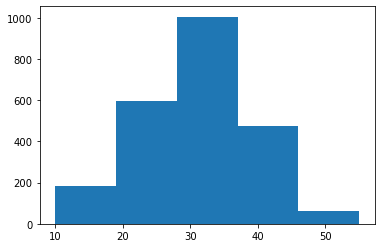

In [5]:
#  what kind of distribution the Age in the telecome dataframe follows: Almost a noraml distribution
import matplotlib.pyplot as plt
plt. hist(df['Age'], bins = 5)

In [172]:
# What's the probability of the age is less than 25?
from scipy.stats import norm
sd = np.std(df['Age'])
mean = np.mean(df['Age'])
prob_less_25 = norm.cdf(25, mean,sd) # cdf stands for cumulative distribution function
prob_less_25

0.24158819420122052

In [176]:
# What's the probability of the age is more than 40?
prob_more_48 = 1- norm.cdf(40, mean, sd)
prob_more_48

0.14474515828741685

In [178]:
# - What's the probability of age between 25  and 40 ?
prob_between_25_40 = norm.cdf(40,mean, sd)- norm.cdf(25,mean,sd)
prob_between_25_40

0.6136666475113626

In [181]:
# What number will 25% of age be less than?
pct_25 = norm.ppf(.25, mean, sd)#ppf: percent point function (or inverse cumulative distribution function)
pct_25

25.227611722495283

### Q2
if company attract more elderly customers in next year in a way that  mean of customers age increase 15% but at the same time the standard deviation of the age distribution will increase by 23%. we want to simulate new customers age 

In [182]:
new_mean = mean+ mean*.15
new_sd = sd+ sd*.23

In [184]:
# Random variables(RVs) to simulate for 2100 customers
new_age = norm.rvs(new_mean, new_sd, size = 2100)

(array([  7.,  18.,  94., 265., 459., 550., 459., 187.,  54.,   7.]),
 array([-2.32744063,  4.82452488, 11.97649039, 19.12845589, 26.2804214 ,
        33.43238691, 40.58435241, 47.73631792, 54.88828342, 62.04024893,
        69.19221444]),
 <BarContainer object of 10 artists>)

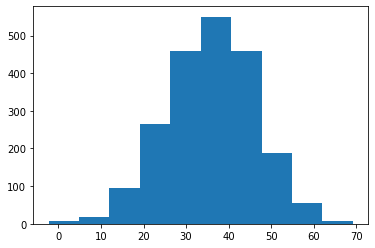

In [186]:
plt.hist(new_age, bins = 10)

In [188]:
# to Calculate amount that 25% of deals will be less than for new_age
pct_25 = norm.ppf(.25,new_mean,new_sd)
pct_25

28.55198991007813

# The central limit theorem

In [4]:
# if we roll a dice 5 times we can simulate this 5 time like bellow:
die = pd.Series([1, 2, 3, 4, 5, 6])
# Roll 5 times
samp_5 = die.sample(5, replace=True)
print(samp_5)

1    2
4    5
3    4
1    2
3    4
dtype: int64


In [192]:
np.mean(samp_5)

3.2

In [48]:
# to repeat sampling of the defined size from array for times 
def mean_samples(array,size_sample, times ):
    sample_means = []
    for i in range(times):
        samp = array.sample(size_sample, replace = True)
        sample_means.append(np.mean(samp))
    return sample_means
    

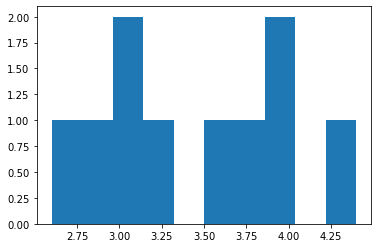

In [49]:
# lets repete the 5 times rolling for 10 times
sample_means = mean_samples(die, 5,10 )
p = plt.hist(sample_means)

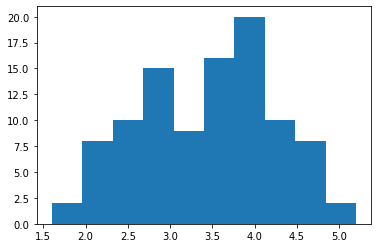

In [50]:
# lets repete the 5 times rolling for 100 times
sample_means = mean_samples(die, 5,100 )
p = plt.hist(sample_means)

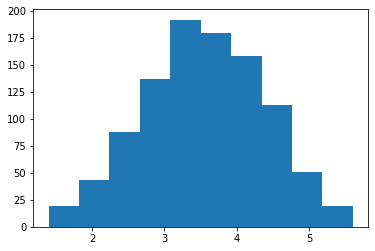

In [51]:
# lets repete the 5 times rolling for 1000 times
sample_means = mean_samples(die, 5,1000 )
p= plt.hist(sample_means)

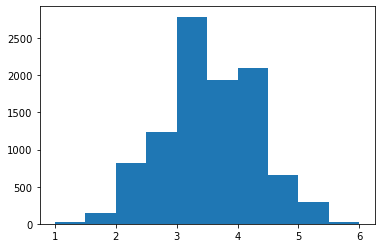

In [207]:
# lets repete the 5 times rolling for 100 times
sample_means = mean_samples(die, 5,10000 )
p = plt.hist(sample_means)

As we can see at the above example, taking mean of samples which are random and independant , distribution of means are normal especially when the number of trails increase

### The central limit theorem: 
>The sampling distribution of a statistic becomes closer to the normal distribution as the number of trials increases.  
> - Samples should be random and independent

In [52]:
# if we repeat what we did for standard deviation agin we can see that the trails standard deviation is distributed normally
# to repeat sampling of the defined size from array for times 
import numpy as np
def std_samples(array,size_sample, times ):
    sample_std = []
    for i in range(times):
        samp = array.sample(size_sample, replace = True)
        sample_std.append(np.std(samp))
    return sample_std

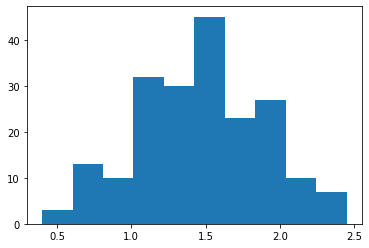

In [11]:
stds = std_samples(die,5, 200 )
p = plt.hist(stds)


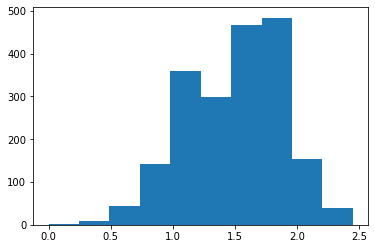

In [12]:
stds = std_samples(die,5, 2000 )
p = plt.hist(stds)

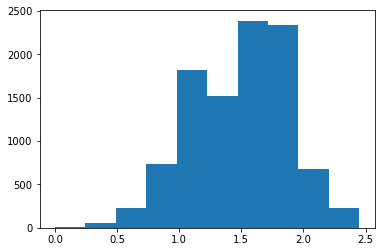

In [13]:
stds = std_samples(die,5, 10000)
p = plt.hist(stds)

In [16]:
# we can do the same for distribution of proportion for instance if we have the bellow employess
employees = pd.Series(["Jack", "Brian", "Claire", "Damian"])
# to chose a sample of 10 from the employess
s_10 = employees.sample(10, replace = True)
s_10

0      Jack
0      Jack
3    Damian
0      Jack
3    Damian
0      Jack
2    Claire
1     Brian
1     Brian
2    Claire
dtype: object

In [22]:
# in the sample the proportion of the Jack is
counts = s_10.value_counts()
p_jack  = counts['Jack']/sum(counts)
p_jack

0.4

In [36]:
# lets repeate the sampling trails for times 
def prop_samples(array,size_sample,item, times ):
    sample_prop = []
    for i in range(times):
        samp = array.sample(size_sample, replace = True)
        counts = samp.value_counts()
        try:
            sample_prop.append(counts[item]/sum(counts))
        except:
            sample_prop.append(0)
    return sample_prop

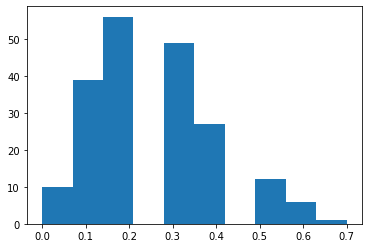

In [44]:
array = employees
size_sample = 10
item = "Jack"
times = 200
props = prop_samples(array,size_sample,item, times )
p = plt.hist(props)

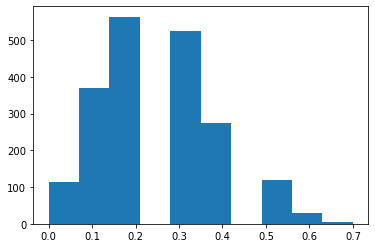

In [45]:
array = employees
size_sample = 10
item = "Jack"
times = 2000
props = prop_samples(array,size_sample,item, times )
p = plt.hist(props)

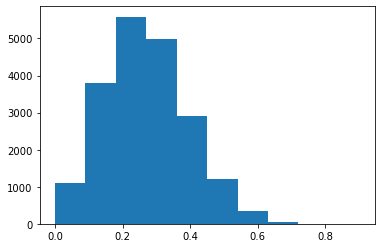

In [46]:
array = employees
size_sample = 10
item = "Jack"
times = 20000
props = prop_samples(array,size_sample,item, times )
p = plt.hist(props)

### Important results
 - Estimate expected value is equal to mean of mean of smaples  
<code>np.mean(sample_means)</code>  
Accordingly :
>- Estimate characteristics of unknown underlying distribution  
>- More easily estimate characteristics of large populations  

In [57]:
# for above eamples 
# die mean of mean of samples 
sample_means = mean_samples(die, 5,1000 )
mean_mean = np.mean(sample_means)
expected_value_fair_die = (1 * 1/6) + (2 * 1/6 ) + (3 * 1/6 ) + (4 * 1/6 ) + (5 * 1/6 ) + (6 * 1/6 ) 
print('expected_value_fair_die =', expected_value_fair_die)
print('mean of mean of samples =', mean_mean)

expected_value_fair_die = 3.5
mean of mean of samples = 3.5048000000000004


In [61]:
#Estimate proportion of "Jack"s
# array = employees
# size_sample = 10
# item = "Jack"
# times = 20000
# props = prop_samples(array,size_sample,item, times )
mean_proportion = np.mean(props)
proportion_jack = 1/4 
print('expected_value_fair_die =', mean_proportion)
print('proportion_jack =', proportion_jack)

expected_value_fair_die = 0.2510200000000001
proportion_jack = 0.25


### CLT Q1
In this exercise, we focus on the sample mean and see the central limit theorem in action while examining the 'Frequency of use' column of telecome more closely
- Create a histogram of the 'Frequency of use' column 
- Take a sample of size 20 with replacement from the 'Frequency of use' column and take the mean.
- Repeat this 100 times using a for loop and store as sample_means. This will take 100 different samples and calculate the mean of each
- Convert sample_means into a pd.Series, create a histogram of the sample_means, and show the plot.

<AxesSubplot:>

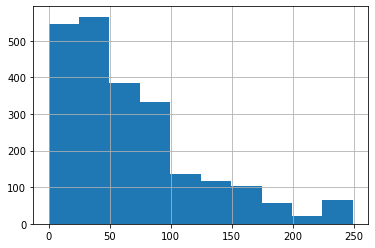

In [62]:
#Create a histogram of the 'Frequency of use' column
df[ 'Frequency of use' ].hist()

In [65]:
samp = df['Frequency of use'].sample(20, replace = True)
mean_samp = np.mean(samp)
mean_samp

59.3

In [ ]:
# to repeat sampling of the defined size from array for times 
def mean_samples(array,size_sample, times ):
    sample_means = []
    for i in range(times):
        samp = array.sample(size_sample, replace = True)
        sample_means.append(np.mean(samp))
    return sample_means

In [68]:
# Repeat this 100 times using a for loop and store as sample_means. This will take 100 different samples and calculate the mean of each
array = df['Frequency of use']
size_sample = 20
times = 100
means = mean_samples(array,size_sample, times )

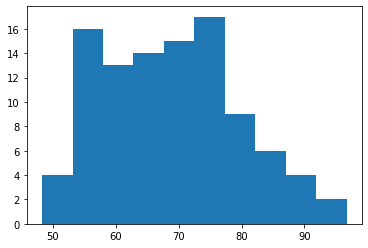

In [73]:
#Convert sample_means into a pd.Series, create a histogram of the sample_means, and show the plot.
means = pd.Series(means)
p = plt.hist(means)

In [74]:
np.mean(means)

68.87099999999998

In [75]:
np.mean(df['Frequency of use']) # based on 

67.34278350515464

#### based on Law of large numbers:
> As the size of your sample increases, the sample mean will approach the expected value
#### based on central limit theorem, CLT:
> As number of trials increase estimate of the expected value is equal to mean of mean of smaples
>> Accordingly: mean of the initial population is almost same as expected value of the population and almost equal as mean of mean of smaples

# The Poisson distribution

### Poisson processes:
Events appear to happen at a certain rate, but completely at random
#### Examples
- Number of animals adopted from an animal shelter per week  
- Number of people arriving at a restaurant per hour  
- Number of earthquakes in California per year

### Poisson distribution:
is a discrete probability distribution. It is probability of some number of events occurring over a fixed period of time
#### Examples
> Probability of ≥ 5 animals adopted from an animal shelter per week  
> Probability of 12 people arriving at a restaurant per hour  
> Probability of < 20 earthquakes in California per year  

- Possion distribution is defined by Lambda (λ) 
- λ = average number of events per time interval
Average number of adoptions per week = 8 -> λ = 8

### Probability of a single value, pmf
- pmf : probability mass function: A probability mass function (pmf) is a function over the sample space of a discrete random variable X which gives the probability that X is equal to a certain value.
> If the average number of adoptions per week is 8, what is P (# adoptions in a week = 5)? pmf


In [76]:
# If the average number of adoptions per week is 8, what is P (# adoptions in a week = 5)?
from scipy.stats import poisson
poisson.pmf(5,8)

0.09160366159257921

### Probability of less than or equal to CDF(cumulative distribution function) 
>  If the average number of adoptions per week is 8, what is P (# adoptions in a week ≤ 5)?

In [77]:
# If the average number of adoptions per week is 8, what is P (# adoptions in a week ≤ 5)?
from scipy.stats import poisson 
poisson.cdf(5,8)

0.19123606207962532

### Probability of greater than (1-cdf)
> If the average number of adoptions per week is 8, what is P (# adoptions in a week > 5)?

In [78]:
# If the average number of adoptions per week is 8, what is P (# adoptions in a week > 5)?
from scipy.stats import poisson 
1-poisson.cdf(5,8)

0.8087639379203747

### Sampling from a Poisson distribution (RVs)
<code> from scipy.stats import poisson
poisson.rvs(8, size=10)</code>

In [79]:
from scipy.stats import poisson
poisson.rvs(8, size=10)

array([ 3, 11,  7,  7,  5,  3, 11, 12,  4, 13])

# Exponential distribution
### Probability of time between Poisson events it also uses lambda (rate) ans is continuous (time)
>Examples
- Probability of > 1 day between adoptions
- Probability of < 10 minutes between restaurant arrivals
- Probability of 6-8 months between earthquakes


#### Ex On average, one customer service ticket is created every 2 minutes
 > λ = 0.5 customer service tickets created each minute 


 > expon.pdf(x, loc, scale) is identically equivalent to expon.pdf(y) / scale with y = (x - loc) / scale
> - pdf = lambda * exp(-lambda * x)

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import expon
import numpy as np


In [ ]:
r = expon.rvs(size = 1000)

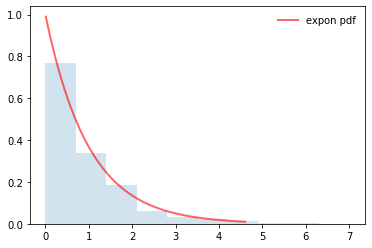

In [18]:
#Display the probability density function (pdf)
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)  # to get 100 values for them probabilities is between 0.01 and .99
ax.plot(x, expon.pdf(x),
       'r-', lw=2, alpha=0.6, label='expon pdf')
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
# P (1 min < wait < 3 min) =
expon.cdf(3, scale=0.5) - expon.cdf(1, scale=0.5)

# t-distribution
> Similar shape as the normal distribution
- Has parameter degrees of freedom (df) which a(ects the thickness of the tails
- Lower df = thicker tails, higher standard deviation
- Higher df = closer to normal distribution

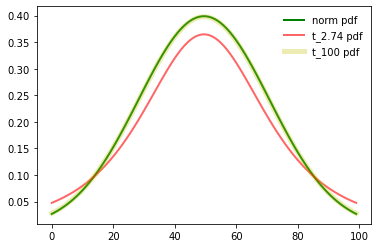

In [29]:
from scipy.stats import norm 
from scipy.stats import t
fig, ax = plt.subplots(1, 1)
# pdf normal distribution
x = np.linspace(norm.ppf(.01),norm.ppf(.99),100)
ax.plot(norm.pdf(x),'g-', lw=2, label='norm pdf')
# pdf t-distribution
df = 2.74
ax.plot(t.pdf(x,df),'r-', lw=2, alpha=0.6, label='t_2.74 pdf')
df = 100
ax.plot(t.pdf(x,df),'y-', lw=5, alpha=0.3, label='t_100 pdf')
ax.legend(loc='best', frameon=False)
plt.show()

# Log-normal distribution
### Variable whose logarithm is normally distributed
> Examples:
- Length of chess games
- Adult blood pressure
- Number of hospitalizations in the 2003
- SARS outbreak

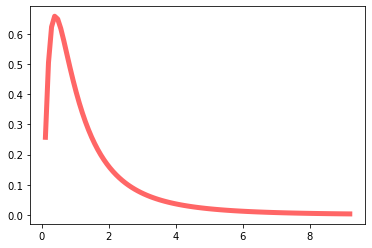

In [33]:
from scipy.stats import lognorm
fig, ax = plt.subplots(1, 1)
s = 0.954
x = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
ax.plot(x, lognorm.pdf(x, s),
       'r-', lw=5, alpha=0.6, label='lognorm pdf')
plt.show()